# K MEANS CLUSTER

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("C:\\Users\ishuk\\Desktop\\sem 6\\lab\\ml_lab_sem_6\\exp_7\\Mall_Customers.csv")
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [3]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Extracting features of dataset

X = dataset.iloc[:,[3,4]].values
#no y becouse cluster data only x

In [7]:
print(X[0])

[15 39]


In [9]:
print(X[:,0])

[ 15  15  16  16  17  17  18  18  19  19  19  19  20  20  20  20  21  21
  23  23  24  24  25  25  28  28  28  28  29  29  30  30  33  33  33  33
  34  34  37  37  38  38  39  39  39  39  40  40  40  40  42  42  43  43
  43  43  44  44  46  46  46  46  47  47  48  48  48  48  48  48  49  49
  50  50  54  54  54  54  54  54  54  54  54  54  54  54  57  57  58  58
  59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137]


In [10]:
#algo methods for finding the k

In [11]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []    
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Within cluster sum of square when k=5 19672.07284901432


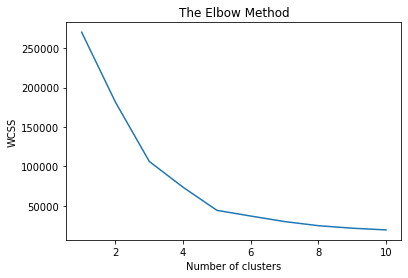

In [13]:
print("Within cluster sum of square when k=5", kmeans.inertia_)
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
print(kmeans)
y_kmeans = kmeans.fit_predict(X)

KMeans(n_clusters=5, random_state=42)


In [15]:
print("center of Cluster are", kmeans.cluster_centers_ )

center of Cluster are [[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


In [16]:
print("Number of iterations", kmeans.n_iter_)

Number of iterations 3


In [17]:
print(y_kmeans )

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


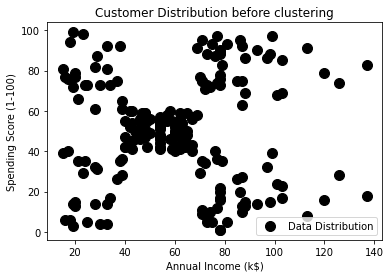

In [18]:
# Visualising the clusters
plt.scatter(X[:,0], X[:,1], s = 100, c = 'black', label = 'Data Distribution')
plt.title('Customer Distribution before clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

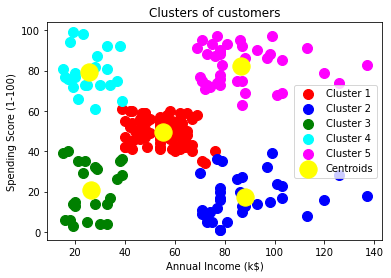

In [19]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

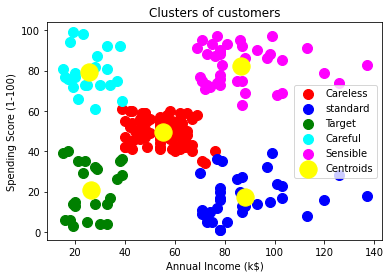

In [20]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careful')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [21]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(kmeans) 
  
# Load the pickled model 
Saved_Model = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
Saved_Model.predict(X)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [22]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(kmeans) 
  
# Load the pickled model 
Saved_Model = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
Saved_Model.predict(X)


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [23]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(kmeans,open('kmeanscluster.pkl', 'wb')) 
# Saving model to disk
# Load the pickled model 
model = pickle.load(open('kmeanscluster.pkl','rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X)


[INFO] Saving model...


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [24]:
# hum log phala flask ma html ki help sa web page bana leya ha
# ab usko connect kara ga jupyter sa
##flask folder C:\Users\ishuk\flask isma ha

In [12]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install flask-ngrok 

Defaulting to user installation because normal site-packages is not writeable


In [37]:
!pip install pyngrok
!ngrok authtoken 2PK4AcZO7Y8zFEVVCEhdBu0jm48_4TnxxFELw71LGKFcb5bkp

Defaulting to user installation because normal site-packages is not writeable
Authtoken saved to configuration file: C:\Users\ishuk\.ngrok2\ngrok.yml


In [63]:
# ya nich wala code "C:\Users\ishuk\Desktop\sem 6\lab\ml_lab_sem_6\exp_7\templates"ya directery sa run ho raha ha na ki C:\Users\ishuk
# q ki model = pickle.load(open('kmeanscluster.pkl','rb')) lode iise directery sa ho raha ha

#or folder templates folder bana ga jis ma index.html aaya ga


In [60]:
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok

import pickle


app = Flask(__name__)
model = pickle.load(open('kmeanscluster.pkl','rb'))   
#run_with_ngrok(app)

@app.route('/')
def home():
    #return "hello world"
    return render_template("index.html")
  
@app.route('/predict',methods=['GET'])
def predict():
  '''
  For rendering results on HTML GUI
  '''
  income = int(request.args.get('income'))
  score = int(request.args.get('score'))
    
    
  predict = model.predict([[income,score ]])
  if predict==[0]:
    result="Customer is careless"

  elif predict==[1]:
    result="Customer is standard"
  elif predict==[2]:
    result="Customer is Target"
  elif predict==[3]:
    result="Customer is careful"

  else:
    result="Custmor is sensible"
    
        
  return render_template('index.html', prediction_text='Model  has predicted  : {}'.format(result))

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [04/May/2023 22:20:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/May/2023 22:20:49] "GET /predict?income=33&score=33 HTTP/1.1" 200 -


In [61]:
#sucess full run